In [1]:
#https://towardsdatascience.com/implementing-gradient-descent-in-python-from-scratch-760a8556c31f

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
# Select independent vars (X), select dependent var (Y)
# Normalize data

X=df[['TV','radio','newspaper']]
Y=df['sales']
Y=np.array((Y-Y.mean())/Y.std())
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

In [3]:
# Y = b + theta*X
# guess initial b and theta

import random
def initialize(dim):
    b=random.random()
    theta=np.random.rand(dim)
    return b,theta
b,theta=initialize(3)
print('Bias: ',b,'Weights: ',theta)

Bias:  0.34626929971884013 Weights:  [0.67071697 0.74017388 0.35851022]


In [4]:
# calculate predictions bsed on bias and thetas

def predict_Y(b,theta,X):
    return b + np.dot(X,theta)
Y_hat=predict_Y(b,theta,X)
Y_hat[0:10]

array([ 2.35598988,  0.58408885,  1.09822051,  1.74029549,  0.44699985,
        1.27520932,  0.00602713, -0.35810957, -2.27689839, -0.42574059])

In [5]:
# define and calculate cost function

import math
def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)
Y_hat=predict_Y(b,theta,X)
get_cost(Y,Y_hat)

0.4480862697585289

In [6]:
# use gradient descent formula to update bias and thetas

def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1
print("After initialization -Bias: ",b,"theta: ",theta)
Y_hat=predict_Y(b,theta,X)
b,theta=update_theta(X,Y,Y_hat,b,theta,0.01)
print("After first update -Bias: ",b,"theta: ",theta)
get_cost(Y,Y_hat)

After initialization -Bias:  0.34626929971884013 theta:  [0.67071697 0.74017388 0.35851022]
After first update -Bias:  0.3393439137244633 theta:  [0.67172452 0.7336534  0.34994717]


0.4480862697585289

In [11]:
# define and run Gradient descent function for 200 iterations

def run_gradient_descent(X,
                         Y,
                         alpha=0.01,
                         num_iterations=100):
  b,theta=initialize(X.shape[1])
  iter_num=0
  gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
  result_idx=0

  for each_iter in range(num_iterations):
    Y_hat=predict_Y(b,theta,X)
    this_cost=get_cost(Y,Y_hat)
    prev_b=b
    prev_theta=theta
    b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)

    if(iter_num%10==0):
      gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
      result_idx=result_idx+1
    iter_num +=1
  print("Final Estimate of b and theta : ",b,theta)

  return gd_iterations_df,b,theta

In [12]:
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=200)

Final Estimate of b and theta :  0.04990156714530065 [0.48823499 0.49463395 0.48779865]


In [13]:
# see cost after a new iteration

gd_iterations_df[0:10]

,iteration,cost
0,0.0,0.754240
1,10.0,0.727248
2,20.0,0.701452
3,30.0,0.676797
4,40.0,0.653228
5,50.0,0.630697
6,60.0,0.609153
7,70.0,0.588552
8,80.0,0.568851
9,90.0,0.550007


Text(0, 0.5, 'Cost or MSE')

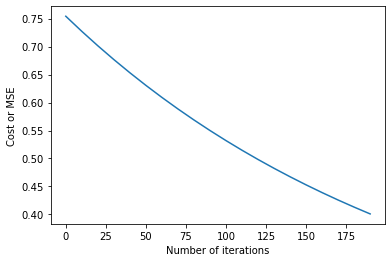

In [14]:
# cost decreases with each iteration of Gradient descent function

%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel('Number of iterations')
plt.ylabel('Cost or MSE')

Final Estimate of b and theta :  2.776260416299555e-16 [ 0.75306591  0.53648155 -0.00433069]
Final Estimate of b and theta :  0.0006270355559315168 [0.74207512 0.50888518 0.0280138 ]


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

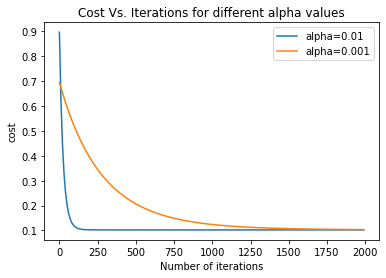

In [15]:
# try different learning rates (0.01 vs 0.001) and see how quickly the cost function converges

alpha_df_1,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=2000)
alpha_df_2,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=2000)
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label='alpha=0.01')
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label='alpha=0.001')
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')